In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Get data for training and validation

In [3]:
file = "internship_train.csv"
dataset = pd.read_csv(file)
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [89]:
#dataset.info()

# View data statistics, we can see, that in current dataset there are no NAN values

In [90]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


# From correlation matrix we can see no correlation present between dataset columns. And we can use all dataset for processing.

In [172]:
# Find all correlations and sort 
correlations_data = dataset.corr()['target'].sort_values()

# Print the most negative correlations
print(correlations_data.head(5), '\n')

# Print the most positive correlations
print(correlations_data.tail(5))

40   -0.007216
35   -0.006267
1    -0.005545
50   -0.005243
29   -0.004785
Name: target, dtype: float64 

31        0.005077
39        0.006283
26        0.006370
7         0.012103
target    1.000000
Name: target, dtype: float64


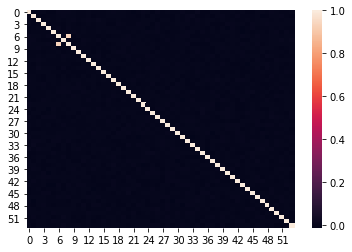

In [164]:
sns.heatmap(dataset.corr());

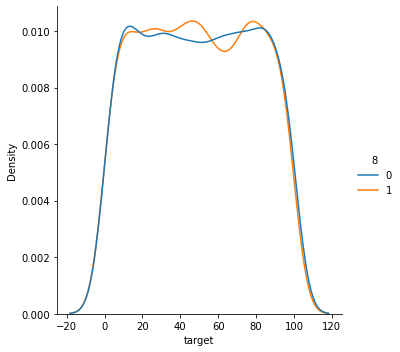

In [171]:
G_Len = 5000
y_axe = dataset.target
y_axe_01 = dataset.iloc[:G_Len,  :]
sns.displot(y_axe_01, x = 'target', hue = '8', kind = 'kde', common_norm=False)
plt.show()

# split internship_train dataset into training and validation datasets

In [166]:
y = dataset.target          # target
X = dataset.iloc[:,  :-1]   # features

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 1)

In [156]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
my_model = DecisionTreeRegressor(random_state=1)

# Fit model
my_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [169]:
# Predict with all validation observations
val_y_predictions = my_model.predict(val_X)

from sklearn.metrics import mean_squared_error 

print("Root Mean Square Error:\n", np.sqrt(mean_squared_error(val_y, val_y_predictions)))

Root Mean Square Error:
 0.0077298844980288215


(0.0, 0.3)

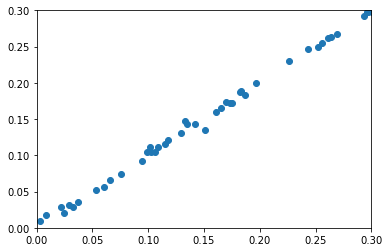

In [170]:
plt.scatter(val_y, val_y_predictions)
plt.ylim(0, .3)
plt.xlim(0, .3)

In [181]:
p_file = "internship_hidden_test.csv"
p_dataset = pd.read_csv(p_file)
predictions = my_model.predict(p_dataset)
# Save predictions
np.savetxt("predictions.csv", predictions, delimiter=",")